In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold
import plotly.express as px
from sklearn.svm import SVC
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
train_data = pd.read_csv("../input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#cabin has more null values. So let's drop cabin column
train_data=train_data.drop(columns=["Cabin"],axis=1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [5]:
#Also let's drop few more columns which doesn't have any impact in our prediction
train_data=train_data.drop(columns=["PassengerId","Name","Ticket"],axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
#missing values
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
test_data = pd.read_csv("../input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [9]:
#Now, Let's fill all the missing values to proceed for our analysis
def Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.87
        elif Pclass==3:
            return 25.14
    else:
        return Age
    

In [10]:
train_data["Age"]=train_data[["Age","Pclass"]].apply(Age,axis=1)

In [11]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
#let's see the rows with missing values
train_data[train_data.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [13]:
train_data.groupby("Pclass")["Embarked"].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [14]:
impute=SimpleImputer(strategy="most_frequent")
train_data[["Embarked"]]=impute.fit_transform(train_data[["Embarked"]])

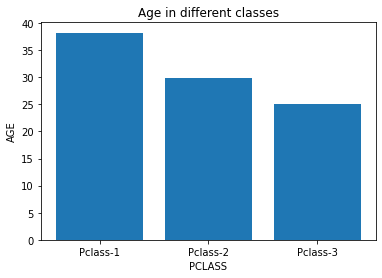

In [15]:
x=["Pclass-1","Pclass-2","Pclass-3"]
y=[38.23,29.87,25.14]
plt.bar(x,y)
plt.xlabel("PCLASS")
plt.ylabel("AGE")
plt.title("Age in different classes")
plt.show()

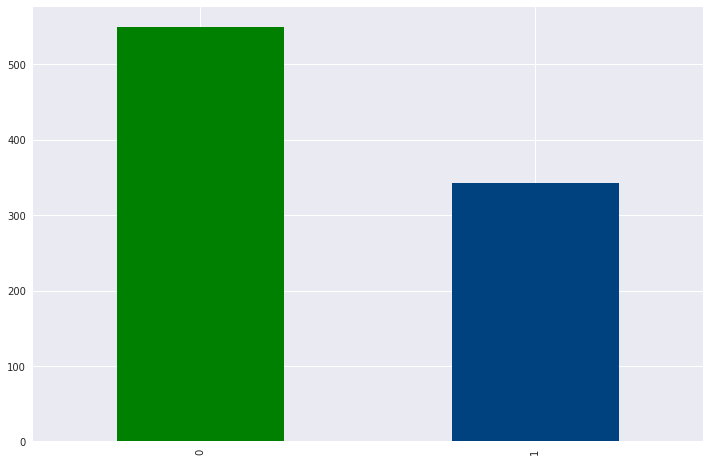

In [16]:
plt.style.use("seaborn")
color=plt.cm.ocean(np.linspace(0,2,5))
train_data["Survived"].value_counts().plot.bar(color=color,figsize=(12,8))
plt.show()

In [17]:
train_data.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

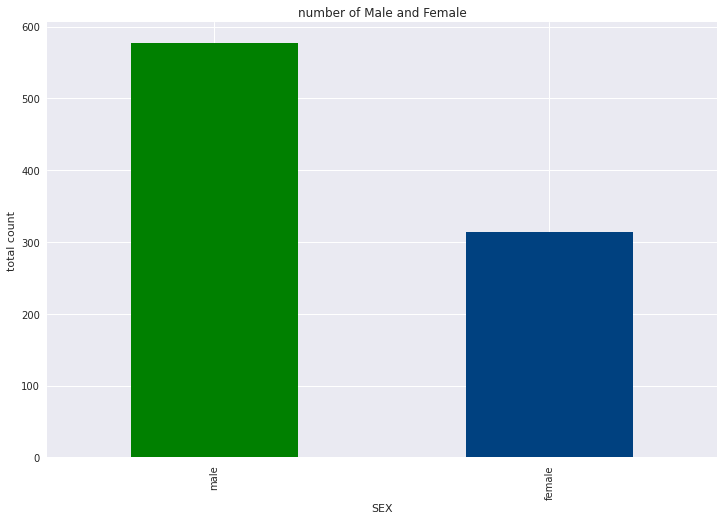

In [18]:
plt.style.use("seaborn")
color=plt.cm.ocean(np.linspace(0,2,5))
train_data["Sex"].value_counts().plot.bar(color=color,figsize=(12,8))
plt.title("number of Male and Female")
plt.xlabel('SEX')
plt.ylabel("total count")
plt.show()

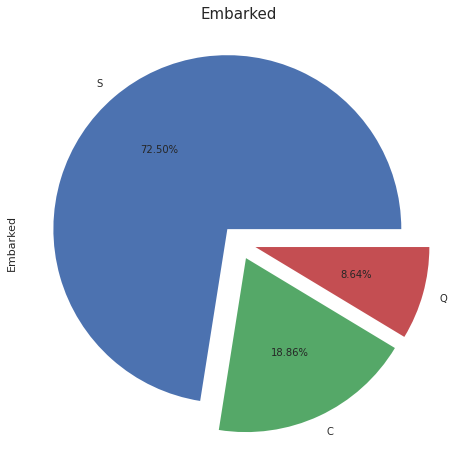

In [19]:
train_data["Embarked"].value_counts().plot.pie(figsize=(12,8),explode=(0.1,0.1,0.1),autopct="%1.2f%%")
plt.title("Embarked",fontsize=15)
plt.show()

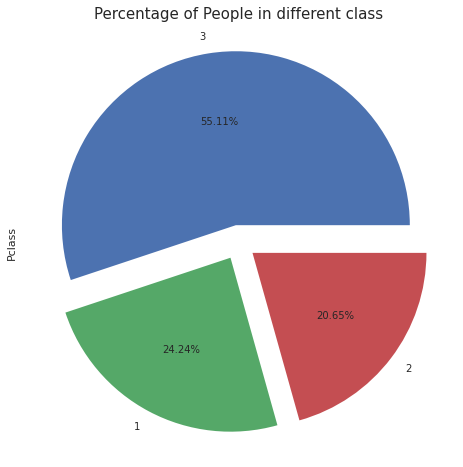

In [20]:
train_data["Pclass"].value_counts().plot.pie(figsize=(12,8),explode=(0.1,0.1,0.1),autopct="%1.2f%%")
plt.title("Percentage of People in different class",fontsize=15)
plt.show()

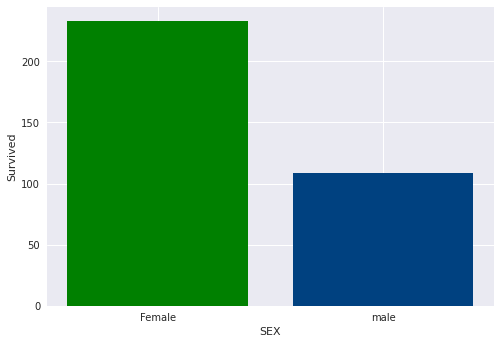

In [21]:
s=train_data.groupby("Sex")["Survived"].value_counts()
color=plt.cm.ocean(np.linspace(0,2,5))
x=["Female","male"]
y=[s[0],s[3]]
plt.bar(x,y,color=color)
plt.xlabel('SEX')
plt.ylabel("Survived")
plt.show()

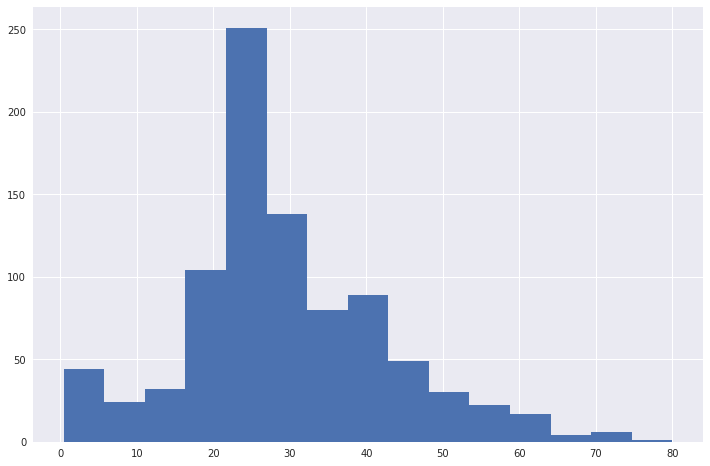

In [22]:
#To see how age is distributed
train_data["Age"].hist(figsize=(12,8),bins=15)
plt.show()

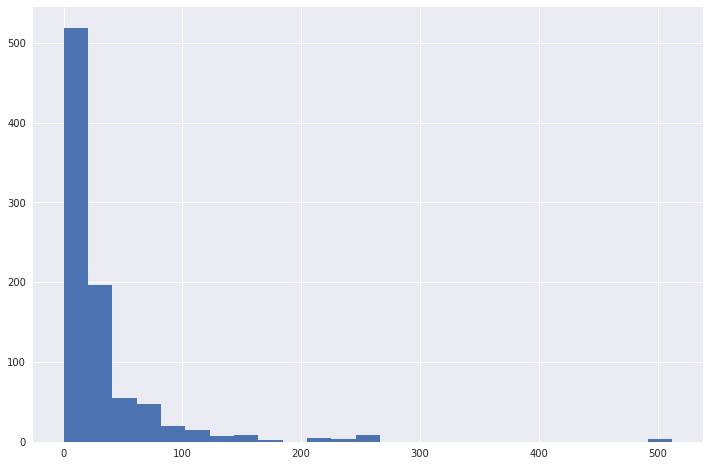

In [23]:
#To see how Fare is distributed
train_data["Fare"].hist(figsize=(12,8),bins=25)
plt.show()

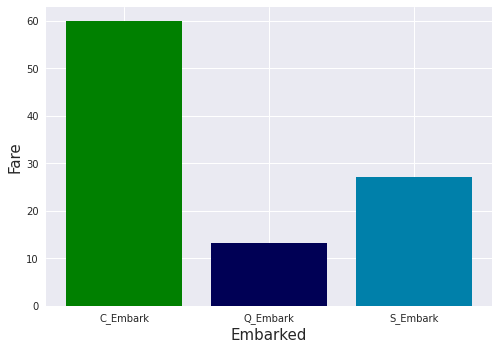

In [24]:
e=train_data.groupby("Embarked")["Fare"].mean()
color=plt.cm.ocean(np.linspace(0,2,7))
x=["C_Embark","Q_Embark","S_Embark"]
y=[e[0],e[1],e[2]]
plt.bar(x,y,color=color)
plt.xlabel("Embarked",fontsize=(15))
plt.ylabel("Fare",fontsize=(15))
plt.show()

In [25]:
fig=px.sunburst(train_data.groupby(["Pclass","Sex","Survived"]).size().reset_index(name="count"),path=["Pclass","Sex","Survived"],values="count",title="Count of Survived Based on Pclass and Sex")
fig.show()

In [26]:

sex=pd.get_dummies(train_data["Sex"],drop_first=True)
Embark=pd.get_dummies(train_data["Embarked"],drop_first=True)

train_data=train_data.drop(columns=["Sex","Embarked"],axis=1)
train_data=pd.concat([train_data,sex,Embark],axis=1)

X=train_data.iloc[:,1:].values
y=train_data.iloc[:,0].values

sc=StandardScaler()
X=sc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

rfc=RandomForestClassifier(max_depth=10,random_state=1)

In [27]:
rfc.fit(X_train,y_train)
pred=rfc.predict(X_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":pred})
print(pred_df)

     Actual  pred
0         0     1
1         1     0
2         1     0
3         1     1
4         0     0
..      ...   ...
174       1     1
175       1     1
176       0     0
177       0     0
178       0     1

[179 rows x 2 columns]


In [28]:
cm=confusion_matrix(y_test,pred)
cm

array([[95,  9],
       [17, 58]])

In [29]:
report=classification_report(y_test,pred)
print("RandomForestClassifier report \n",report)

RandomForestClassifier report 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       104
           1       0.87      0.77      0.82        75

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.85      0.85       179



In [30]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
pred=ada.predict(X_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":pred})
print(pred_df)

     Actual  pred
0         0     1
1         1     1
2         1     0
3         1     1
4         0     0
..      ...   ...
174       1     1
175       1     1
176       0     0
177       0     0
178       0     1

[179 rows x 2 columns]


In [31]:
cm=confusion_matrix(y_test,pred)
cm

array([[89, 15],
       [19, 56]])

In [32]:
report=classification_report(y_test,pred)
print("AdaBoostClassifier report \n",report)

AdaBoostClassifier report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       104
           1       0.79      0.75      0.77        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [33]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
predict=classifier.predict(X_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":pred})
print(pred_df)

     Actual  pred
0         0     1
1         1     1
2         1     0
3         1     1
4         0     0
..      ...   ...
174       1     1
175       1     1
176       0     0
177       0     0
178       0     1

[179 rows x 2 columns]


In [34]:
cm=confusion_matrix(y_test,pred)
cm

array([[89, 15],
       [19, 56]])

In [35]:
report=classification_report(y_test,pred)
print("KNeighborsClassifier report \n",report)

KNeighborsClassifier report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       104
           1       0.79      0.75      0.77        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [36]:
classifier = SVC()
classifier.fit(X_train, y_train)
predict=classifier.predict(X_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":pred})
print(pred_df)

     Actual  pred
0         0     1
1         1     1
2         1     0
3         1     1
4         0     0
..      ...   ...
174       1     1
175       1     1
176       0     0
177       0     0
178       0     1

[179 rows x 2 columns]


In [37]:
cm=confusion_matrix(y_test,pred)
cm

array([[89, 15],
       [19, 56]])

In [38]:
report=classification_report(y_test,pred)
print("SVC report \n",report)

SVC report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       104
           1       0.79      0.75      0.77        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [39]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predict=classifier.predict(X_test)
pred_df=pd.DataFrame({"Actual":y_test,"pred":pred})
print(pred_df)

     Actual  pred
0         0     1
1         1     1
2         1     0
3         1     1
4         0     0
..      ...   ...
174       1     1
175       1     1
176       0     0
177       0     0
178       0     1

[179 rows x 2 columns]


In [40]:
cm=confusion_matrix(y_test,pred)
cm

array([[89, 15],
       [19, 56]])

In [41]:
report=classification_report(y_test,pred)
print("Logistic Regression \n",report)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       104
           1       0.79      0.75      0.77        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [42]:
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test) 
pred_df=pd.DataFrame({"Actual":y_test,"pred":pred})
print(pred_df)

     Actual  pred
0         0     1
1         1     1
2         1     0
3         1     1
4         0     0
..      ...   ...
174       1     1
175       1     1
176       0     0
177       0     0
178       0     1

[179 rows x 2 columns]


In [43]:
cm=confusion_matrix(y_test,pred)
cm

array([[89, 15],
       [19, 56]])

In [44]:
report=classification_report(y_test,pred)
print("GaussianNB \n",report)

GaussianNB 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       104
           1       0.79      0.75      0.77        75

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [45]:
test=test_data.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

In [46]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [47]:
def Age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 38.23
        elif Pclass==2:
            return 29.87
        elif Pclass==3:
            return 25.14
    else:
        return Age

In [48]:
sex=pd.get_dummies(test["Sex"],drop_first=True)
Embark=pd.get_dummies(test["Embarked"],drop_first=True)

In [49]:
test["Age"]=test[["Age","Pclass"]].apply(Age,axis=1)

In [50]:
test=test.drop(columns=["Sex","Embarked"],axis=1)
test=pd.concat([test,sex,Embark],axis=1)
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
dtype: int64

In [51]:
test["Fare"]=test["Fare"].fillna(test["Fare"].mean())
test=sc.fit_transform(test)
y_pred=rfc.predict(test)

In [52]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved.")


Your submission was successfully saved.


In [54]:
print(output.head())


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
